    INFO : 2020-05-20 07:12:07,058 : start: simulate
    INFO : 2020-05-20 07:12:07,182 :   index: 0.00%
    INFO : 2020-05-20 07:12:07,683 :   index: 2.97%
    INFO : 2020-05-20 07:12:08,202 :   index: 5.95%
    INFO : 2020-05-20 07:12:08,718 :   index: 8.92%
    INFO : 2020-05-20 07:12:09,222 :   index: 11.90%
    INFO : 2020-05-20 07:12:09,715 :   index: 14.87%
    INFO : 2020-05-20 07:12:10,237 :   index: 17.85%
    INFO : 2020-05-20 07:12:10,775 :   index: 20.82%
    INFO : 2020-05-20 07:12:11,291 :   index: 23.79%
    INFO : 2020-05-20 07:12:11,798 :   index: 26.77%
    INFO : 2020-05-20 07:12:12,329 :   index: 29.74%
    INFO : 2020-05-20 07:12:12,873 :   index: 32.72%
    INFO : 2020-05-20 07:12:13,398 :   index: 35.69%
    INFO : 2020-05-20 07:12:13,893 :   index: 38.67%
    INFO : 2020-05-20 07:12:14,391 :   index: 41.64%
    INFO : 2020-05-20 07:12:14,888 :   index: 44.61%
    INFO : 2020-05-20 07:12:15,389 :   index: 47.59%
    INFO : 2020-05-20 07:12:15,884 :   index: 50.5

230912.09584456822


/Users/shuheikatori/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


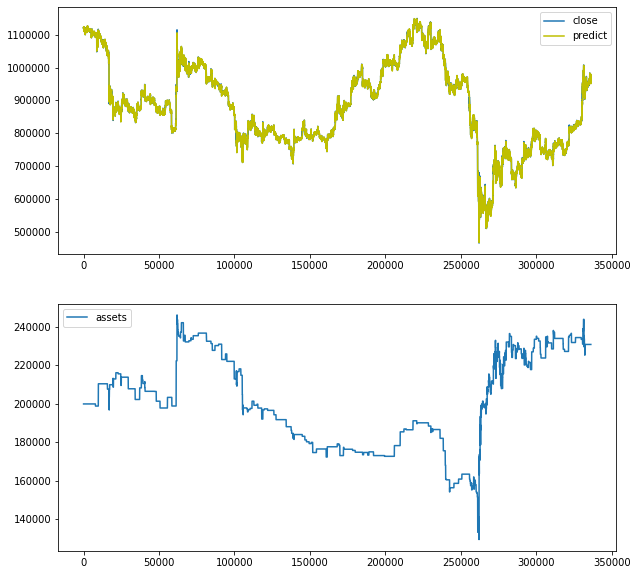

In [1]:
import pickle
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator
%matplotlib inline

def plot(x, y_close, y_pred, y_assets):
    _, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close, label='close')
    ax1.plot(list(range(len(x))), y_pred, label='predict')
    ax1.legend()
    ax3.plot(list(range(len(x))), y_assets, label='assets')
    ax3.legend()
    plt.show()

def main():
    file_name = "v0.0.11-test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")

    with open("models/" + file_name + ".pickle", mode="rb") as file:
        model = pickle.load(file)

    test_start = int(len(csv) * 0.8)  # 最後20%のデータでテスト
    data = csv[test_start:]

    s = simulator.BitcoinSimulator(200000)
    
    x = data
    x.reset_index(drop=True, inplace=True)
    y_close = list(x["close"])
    # y_result = list(x["extreme60"])
    p = model.predict(x[bitcoin.TRAIN_COLUMNS])
    pred = pd.DataFrame(p)
    pred.columns = ["pred"]
    y_pred = list(pred["pred"] * x["open"])  # TODO: Build in simulator.py
    y_assets = list(s.simulate(data, model))
    print(y_assets[-1])
    
    plot(x, y_close, y_pred, y_assets)
    
if __name__ == "__main__":
    main()